stage 2

feed list of dates and get satelight images for each date
 would the polygon associated with the fire also have to be in the function?

notas
- for loop
- function?

In [ ]:
#resources used
#https://stackoverflow.com/questions/6871016/adding-days-to-a-date-in-python


In [24]:
!pip install gemgis #(1.1.6)

In [26]:
import datetime
import geopandas as gpd
import gemgis as gg

In [92]:
#import eucalyptus in fires shapfiles
#import shapefiles
EucList= gpd.read_file("Euc/EucInFires.shp")
FiresWithEuc = gpd.read_file("Fire/FiresWithEuc.shp")

#create a list with the alarm_dates
fdates = FiresWithEuc['ALARM_DATE']
fdates_list = list(fdates)


['2020-08-16',
 '2020-08-16',
 '2020-02-28',
 '2005-07-19',
 '2005-07-26',
 '2008-06-20',
 '2008-06-11',
 '2008-06-22',
 '2009-08-12',
 '2010-06-18',
 '2004-05-09',
 '2011-07-20',
 '2015-05-10',
 '2021-01-19',
 '2022-06-21',
 '2020-05-24',
 '2020-08-17',
 '2020-09-27',
 '2020-06-05',
 '2020-08-18',
 '2003-08-26',
 '2004-06-25',
 '2013-07-04',
 '2013-07-26',
 '2013-05-01',
 '2017-08-27',
 '2017-10-08',
 '2017-10-08',
 '2017-10-08',
 '2017-10-08',
 '2019-10-23',
 '2022-06-23',
 '2017-10-09']

In [ ]:
''' the problem with the below method is that it doesn't just extract the coords
i will need to create a function with a for loop that will extract just the xy geometry of the centroid column
i belive the following link should help me do this.

https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/01_extract_xy.html
'''

In [84]:
# create centroid of each fire 
FiresWithEuc["centroid"] = FiresWithEuc.centroid
FiresWithEuc["centroid"]
#fdates_list

centroids_col = FiresWithEuc['centroid']
#centroids_list = list(centroids_col)

#puts x and y coordinates into a new column in the geodataframe
FiresWithEuc["x"] = FiresWithEuc.centroid.x
FiresWithEuc["y"] = FiresWithEuc.centroid.y


#FiresWithEuc[["x","y"]]
#creates a new column that combines the x and y coordinates separated by a column in parenthesis
FiresWithEuc['xy'] = FiresWithEuc.apply(lambda row: f"({row['x']}, {row['y']})", axis=1)
#FiresWithEuc['xy']
#drops individual x and y columns as theyre no longer needed
FiresWithEuc = FiresWithEuc.drop(columns=['x','y'])
FiresWithEuc_xy = FiresWithEuc['xy']


In [94]:
FiresWithEuc_xylist = list(FiresWithEuc_xy)
#for entry in FiresWithEuc_xylist:
#    print(entry)

FiresWithEuc_xylist

['(-13605896.412321707, 4459697.520420889)',
 '(-13519456.41726052, 4488270.417491201)',
 '(-13629201.59506469, 4537553.918969497)',
 '(-13532577.408406617, 4531541.664553867)',
 '(-13565486.924875727, 4524455.057182984)',
 '(-13560727.542358777, 4430672.310612718)',
 '(-13596177.777028902, 4445764.066767888)',
 '(-13627172.317468798, 4534450.68453329)',
 '(-13604823.114726292, 4450621.765492678)',
 '(-13537065.53896654, 4549682.827212654)',
 '(-13642225.296488944, 4562900.175688107)',
 '(-13638830.314101947, 4555314.778814859)',
 '(-13660723.658249944, 4565664.645417509)',
 '(-13562654.63421647, 4436024.982576997)',
 '(-13612396.23965091, 4503103.089760357)',
 '(-13659895.079141738, 4622732.833234768)',
 '(-13693682.3238792, 4666830.815168608)',
 '(-13641770.30844558, 4655726.144323494)',
 '(-13643165.27813738, 4611565.82613303)',
 '(-13672380.559213018, 4582716.047256418)',
 '(-13573172.129983775, 4578062.080277436)',
 '(-13597169.063795296, 4580499.491858096)',
 '(-13618460.24395320

<Axes: >

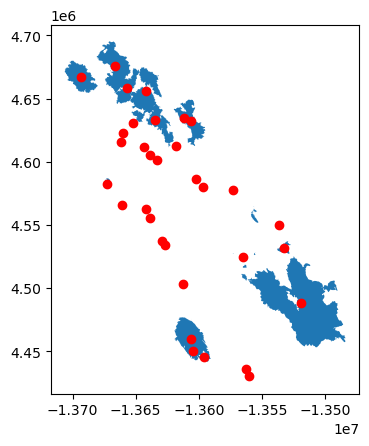

In [4]:
ax = FiresWithEuc.plot()
FiresWithEuc["centroid"].plot(ax = ax, color = "red")

In [96]:
'''
i need to figure out what are the appropriate widths/heights for this but i am using stand in values for now
i wanted to test it with the centroid data before i continue here but i have realized i need to 
convert them into a proper list/ extract the xy points before i can do that.....
'''
def create_bounding_boxes(centroids, box_width, box_height):
#this function takes a list of centroid points and convernts them into a bbbox to use for querying sattelitte images.
# the the size of the bbox should theoretically be large enought to contain the largest fire    
    bounding_boxes = []

    for centroid in centroids:
        x, y = centroid
        half_width = box_width / 2
        half_height = box_height / 2

        # Calculate bounding box coordinates
        bbox = (
            x - half_width,
            y - half_height,
            x + half_width,
            y + half_height,
        )

        bounding_boxes.append(bbox)

    return bounding_boxes

# Example usage
centroids = [(10, 20), (30, 40), (50, 60)]
box_width = 5
box_height = 5

result = create_bounding_boxes(centroids, box_width, box_height)
print(result)


[(7.5, 17.5, 12.5, 22.5), (27.5, 37.5, 32.5, 42.5), (47.5, 57.5, 52.5, 62.5)]


In [6]:
# function that create a bb from the centroid point

def cent_to_bbox(centroid):
    #this function takes a list of centroid points and convernts them into a bbbox to use for querying sattelitte images.
    # the the size of the bbox should theoretically be large enought to contain the largest fire
    """returns a list containing the bottom left and the top right 
    points in the sequence
    Here, we use min and max four times over the collection of points
    """
    bot_left_x = min(point[0] for point in points)
    bot_left_y = min(point[1] for point in points)
    top_right_x = max(point[0] for point in points)
    top_right_y = max(point[1] for point in points)

    return [(bot_left_x, bot_left_y), (top_right_x, top_right_y)]

In [95]:
'''
sucess!
'''

#function to take alist of dates and centeroids from shapefiles of fire locations and return image collections 
def get_landsat_images(dates):
    #dates takes a list of dates in mm/dd/yy format
    #centroid takes 
    for alarm_date in dates:
        # Calculate start and end dates within 30 day month range
        datex = datetime.datetime.strptime(alarm_date, "%Y-%m-%d")
        start_date = datex - datetime.timedelta(days=30)
        start_date = start_date.strftime("%Y-%m-%d")
        end_date = datex + datetime.timedelta(days=30)
        end_date = end_date.strftime("%Y-%m-%d")
        print(f"Alarm Date: {alarm_date}, Start Date: {start_date}, End Date: {end_date}")
        

get_landsat_images(fdates_list)

Alarm Date: 2020-08-16, Start Date: 2020-07-17, End Date: 2020-09-15
Alarm Date: 2020-08-16, Start Date: 2020-07-17, End Date: 2020-09-15
Alarm Date: 2020-02-28, Start Date: 2020-01-29, End Date: 2020-03-29
Alarm Date: 2005-07-19, Start Date: 2005-06-19, End Date: 2005-08-18
Alarm Date: 2005-07-26, Start Date: 2005-06-26, End Date: 2005-08-25
Alarm Date: 2008-06-20, Start Date: 2008-05-21, End Date: 2008-07-20
Alarm Date: 2008-06-11, Start Date: 2008-05-12, End Date: 2008-07-11
Alarm Date: 2008-06-22, Start Date: 2008-05-23, End Date: 2008-07-22
Alarm Date: 2009-08-12, Start Date: 2009-07-13, End Date: 2009-09-11
Alarm Date: 2010-06-18, Start Date: 2010-05-19, End Date: 2010-07-18
Alarm Date: 2004-05-09, Start Date: 2004-04-09, End Date: 2004-06-08
Alarm Date: 2011-07-20, Start Date: 2011-06-20, End Date: 2011-08-19
Alarm Date: 2015-05-10, Start Date: 2015-04-10, End Date: 2015-06-09
Alarm Date: 2021-01-19, Start Date: 2020-12-20, End Date: 2021-02-18
Alarm Date: 2022-06-21, Start Date